In [35]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_csv('../Data/crime_data_updated.csv')

In [36]:
# 3) Count the number of crimes per year

# Assuming your cleaned dataset is already loaded as crime_data
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')

# Create a new column 'Year' by extracting the year from the Date column
crime_data['Year'] = crime_data['Date'].dt.year

# Count crimes per year using groupby and size
crimes_per_year = crime_data.groupby('Year').size()
print(crimes_per_year)

Year
2003    142803
2004    142054
2005    137048
2006    131856
2007    131771
2008    135242
2009    134309
2010    127758
2011    126713
2012    135464
2013    147664
2014    144844
2015    151459
2016    145994
2017    149487
2018    143663
2019    138380
2020    112167
2021    121722
2022    127404
2023    125024
dtype: int64


In [37]:
# Malicious mischief is likely to be vandalism redefined and we'll combine weapons offences to weapon laws
category_mapping = {
    # Vandalism
    'MALICIOUS MISCHIEF': 'VANDALISM',
    
    # Weapon laws
    'WEAPONS OFFENSE': 'WEAPON LAWS',
    'WEAPONS CARRYING ETC': 'WEAPON LAWS',
    'WEAPONS OFFENCE': 'WEAPON LAWS',
}

# Apply the mapping to standardize categories
crime_data['Category'] = crime_data['Category'].replace(category_mapping)

crime_data.to_csv('./crime_data_updated.csv', index=False)

In [38]:
# Get the year with the most crimes
year_most_crimes = crimes_per_year.idxmax()
max_crimes = crimes_per_year.max()

# Get the year with the fewest crimes
year_fewest_crimes = crimes_per_year.idxmin()
min_crimes = crimes_per_year.min()

print("Year with most crimes:", year_most_crimes, "with", max_crimes, "crimes")
print("Year with fewest crimes:", year_fewest_crimes, "with", min_crimes, "crimes")

Year with most crimes: 2015 with 151459 crimes
Year with fewest crimes: 2020 with 112167 crimes


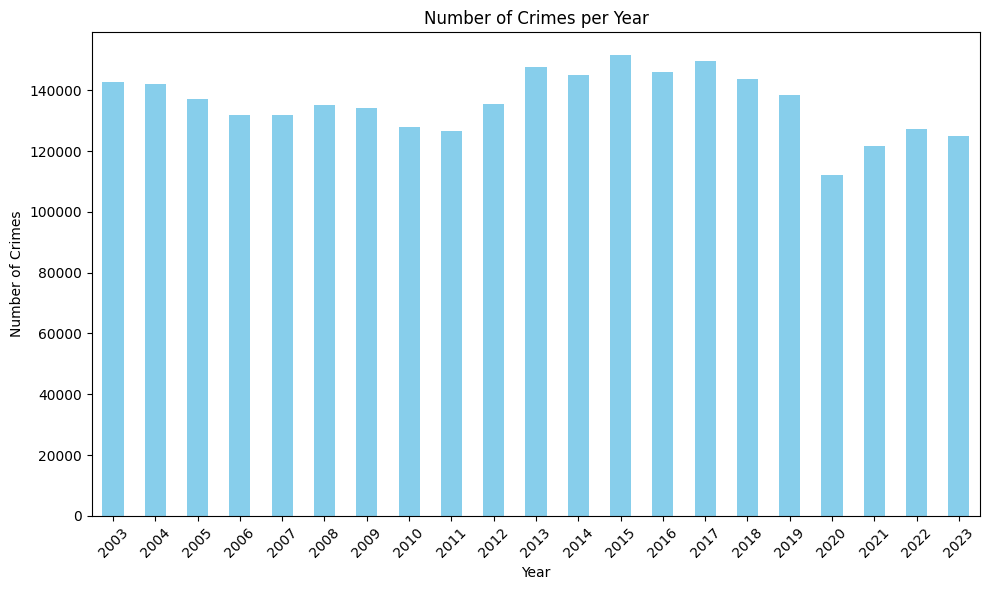

In [39]:
# If you haven't sorted the index, you can sort by year
crimes_per_year_sorted = crimes_per_year.sort_index()

plt.figure(figsize=(10, 6))
crimes_per_year_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [40]:
# Print out all of the categories of crime in the dataset
crime_categories = crime_data['Category'].unique()
print(crime_categories)

['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA' 'LOST PROPERTY' 'OTHER' 'FIRE REPORT'
 'TRAFFIC COLLISION' 'COURTESY REPORT'
 'OFFENCES AGAINST THE FAMILY AND CHILDREN' 'FORGERY AND COUNTERFEITING'
 'MISCELLANEOUS INVESTIGATION' 'TRAFFIC VIOLATION ARREST'
 'VEHICLE MISPLACED' 'SUSPICIOUS' nan 'CASE CLOSURE' 'CIVIL SIDEWALKS'
 'VEHICLE IMPOUNDED' 'HOMICIDE' 'HUMAN TRAFFICKING']


In [41]:
# Malicious mischief is likely to be vandalism redefined and we'll combine weapons offences to weapon laws
category_mapping = {
    # Vandalism
    'MALICIOUS MISCHIEF': 'VANDALISM',
    
    # Weapon laws
    'WEAPONS OFFENSE': 'WEAPON LAWS',
    'WEAPONS CARRYING ETC': 'WEAPON LAWS',
    'WEAPONS OFFENCE': 'WEAPON LAWS',
}

# Apply the mapping to standardize categories
crime_data['Category'] = crime_data['Category'].replace(category_mapping)

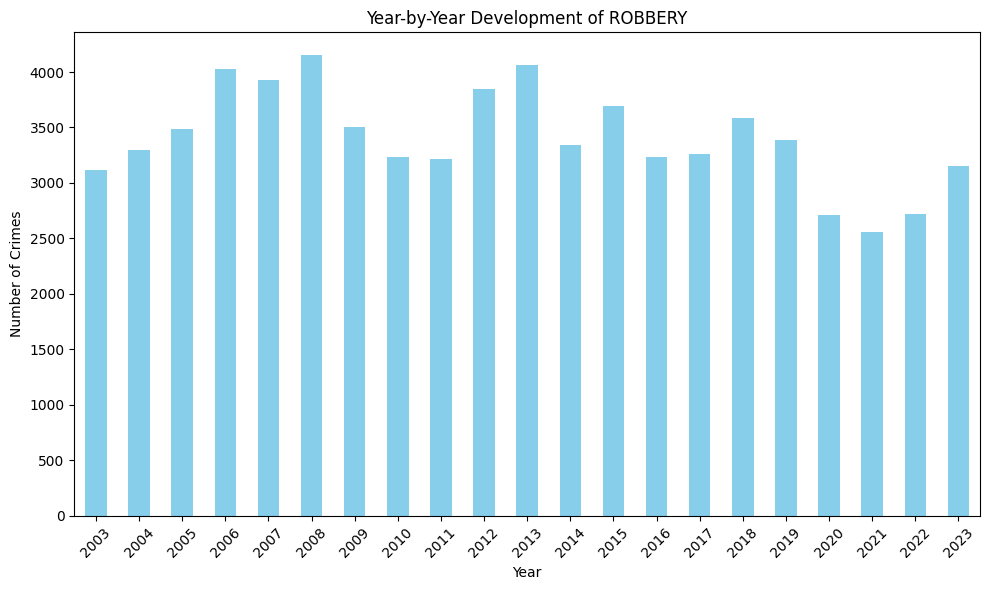

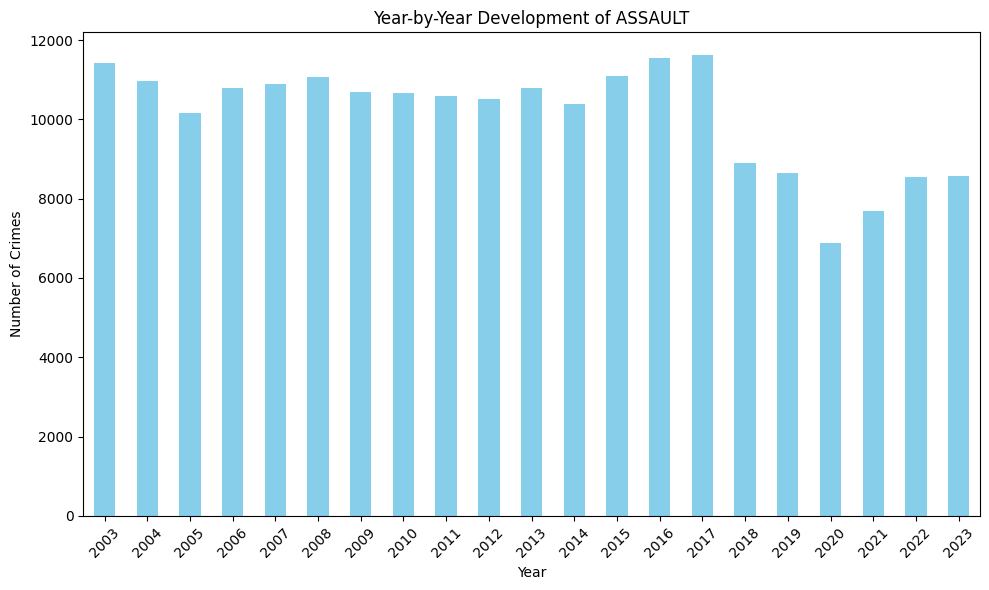

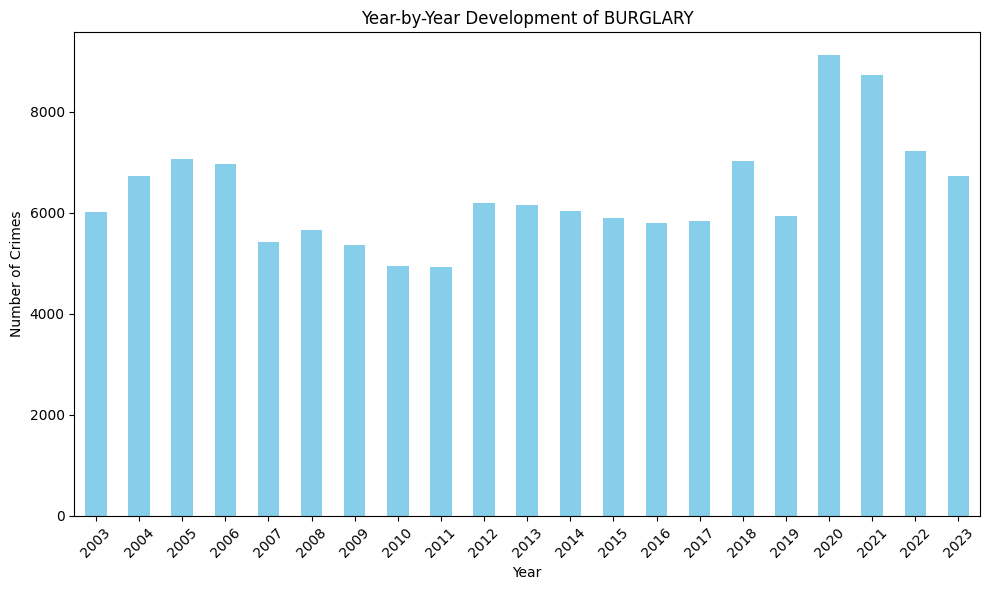

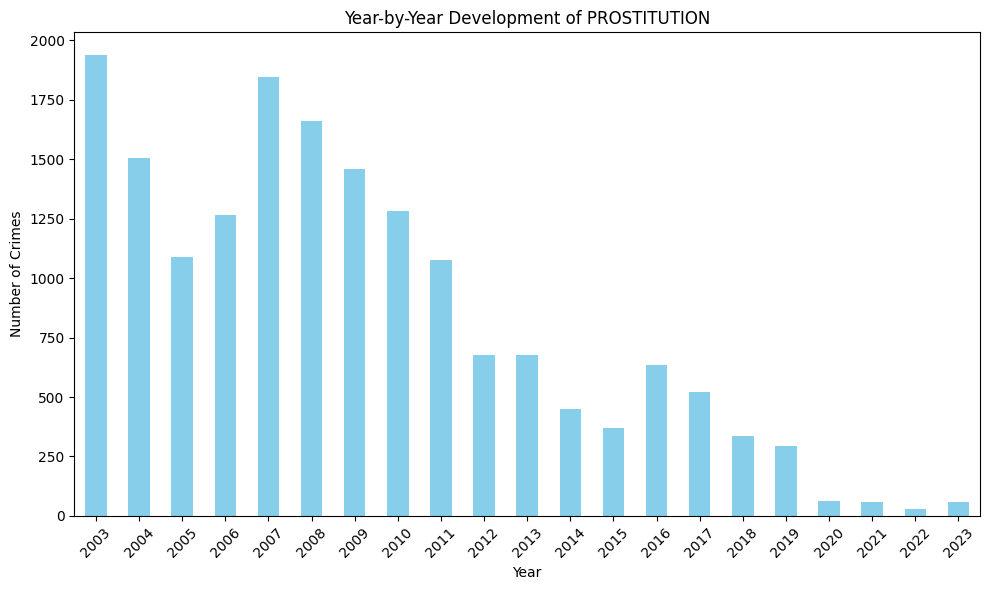

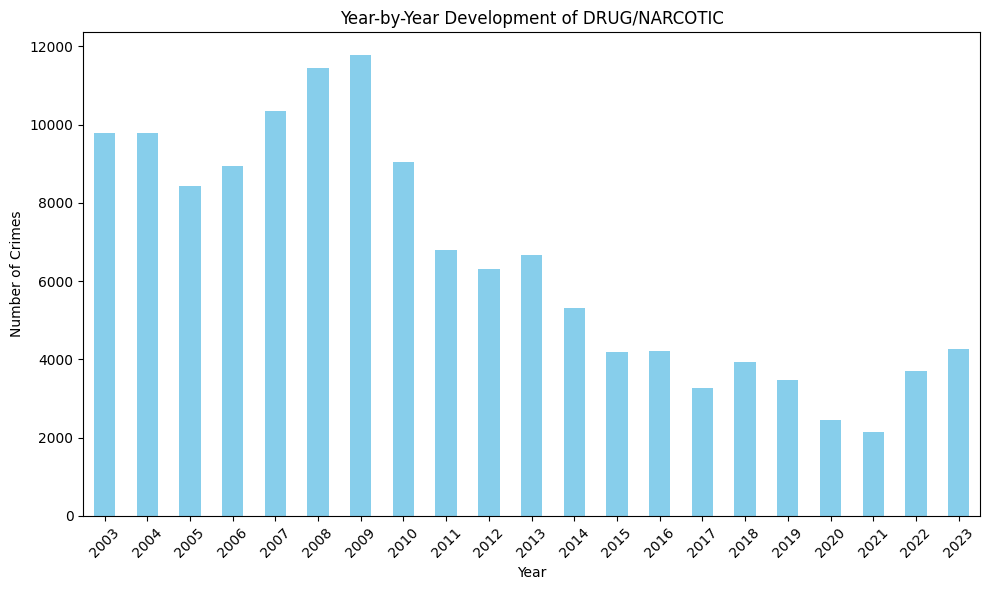

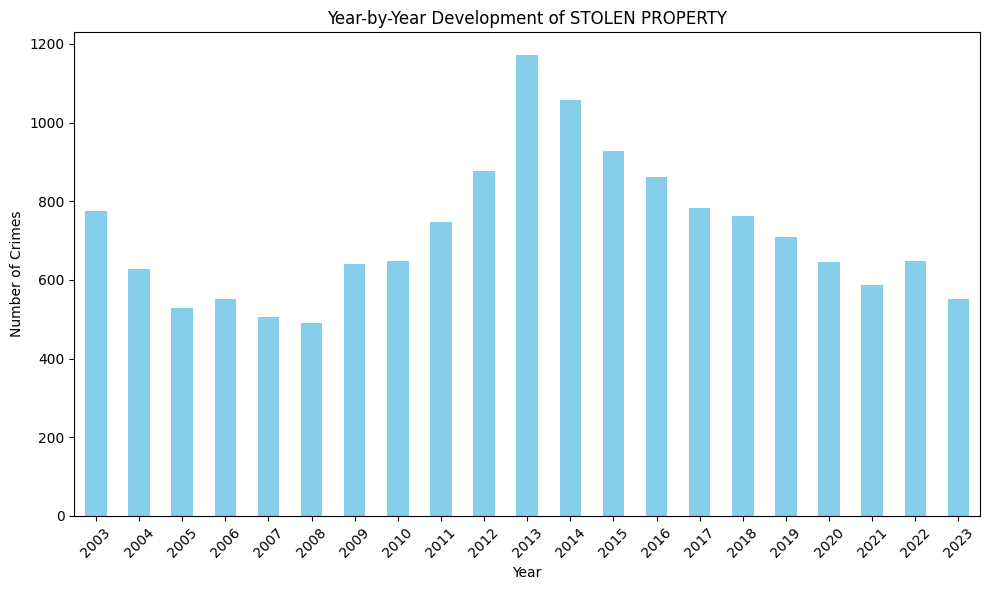

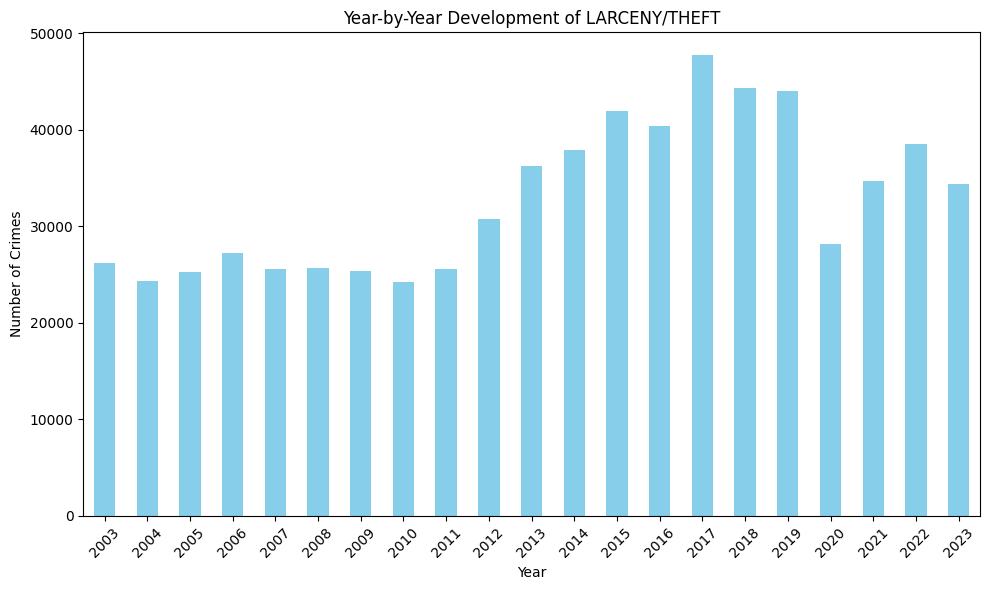

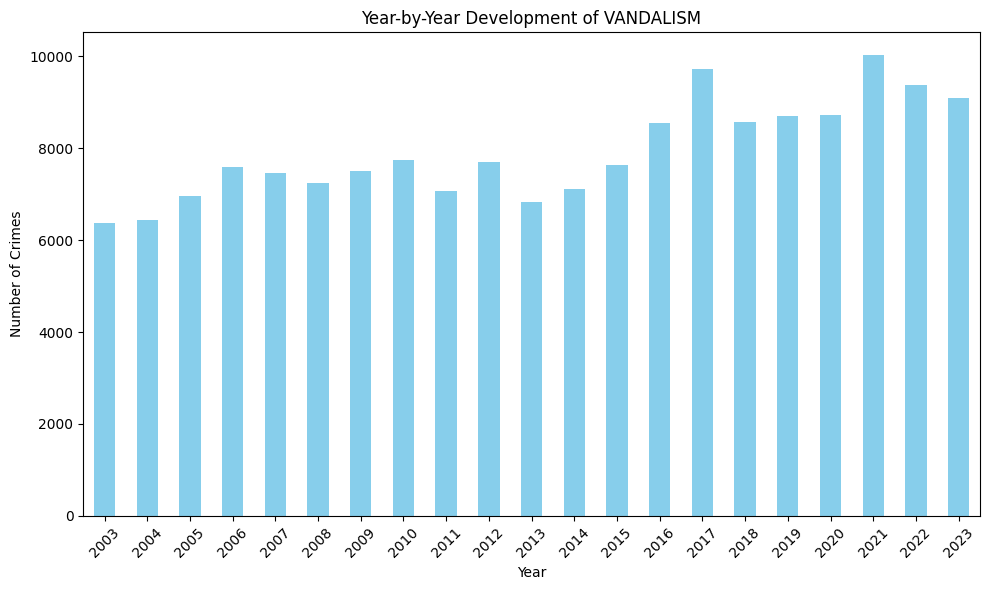

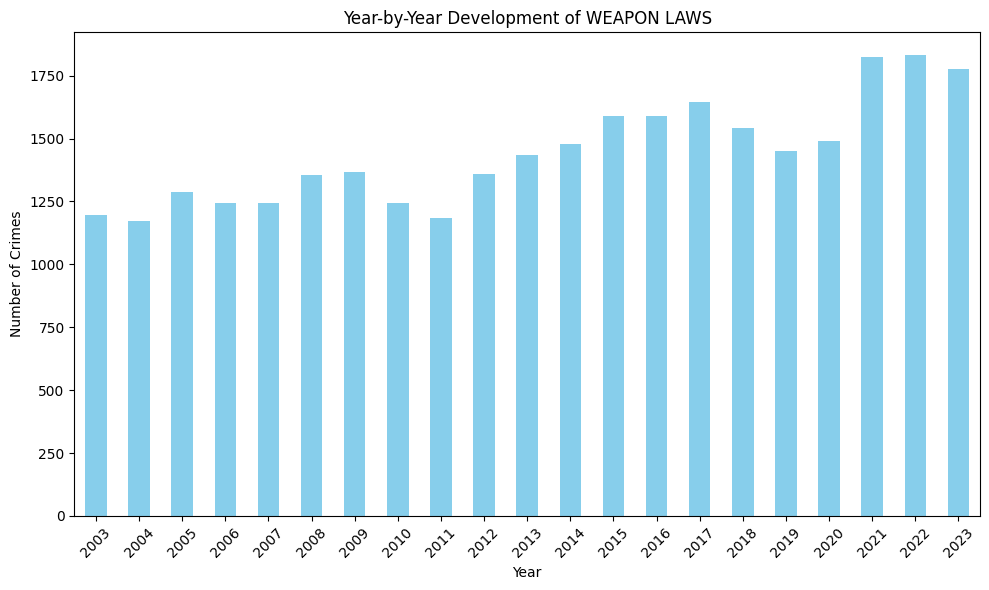

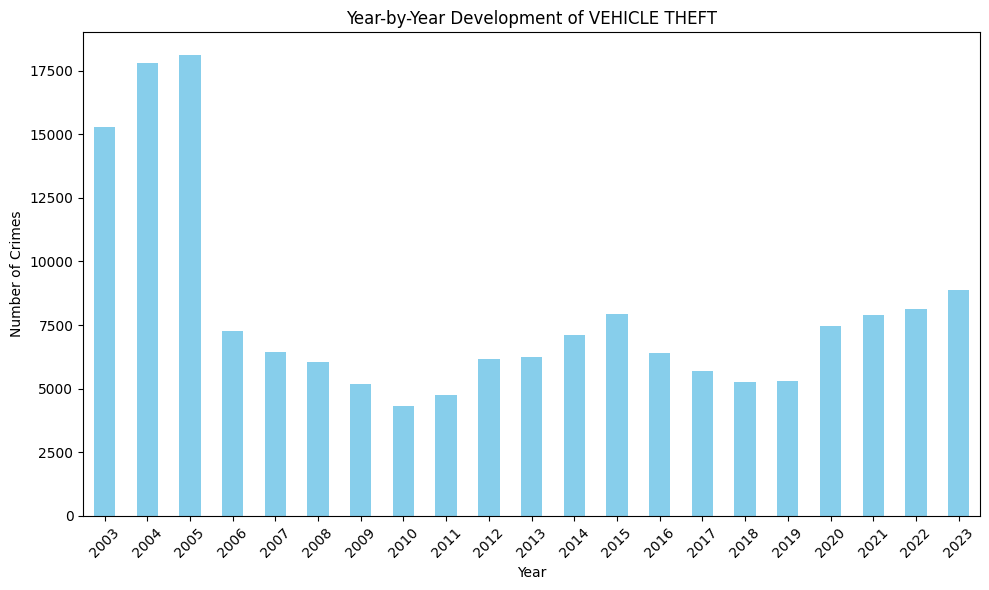

In [42]:
# Now to plot the focus crimes bar plots

# Define the focus crime categories
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# Filter the data to include only years from 2003 to 2023
crime_data['Year'] = pd.to_datetime(crime_data['Date'], errors='coerce').dt.year
filtered_data = crime_data[(crime_data['Year'] >= 2003) & (crime_data['Year'] <= 2023)]

# Loop over each focus crime category
for crime in focuscrimes:
    # Filter for the current crime category
    crime_subset = filtered_data[filtered_data['Category'] == crime]
    
    # Count the number of crimes per year
    crimes_per_year = crime_subset['Year'].value_counts().sort_index()
    
    # To ensure that every year from 2003 to 2017 is represented even if the count is zero:
    all_years = pd.Series(0, index=range(2003, 2024))
    crimes_per_year = all_years.add(crimes_per_year, fill_value=0).astype(int)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    crimes_per_year.plot(kind='bar', color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.title(f'Year-by-Year Development of {crime}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()